About this file

Paid or unpaid loan:
0 - the client has paid the loan;
1 - the client hasn't paid the loan.

In [163]:
!pip install phik -q
!pip install xgboost -q
!pip install catboost -q

In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder

from phik.report import plot_correlation_matrix
from phik import report
from phik import phik_matrix

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

In [165]:
def phik_features_matrix(df, interval_cols):
    phik_overview = phik_matrix(df, interval_cols=interval_cols)

    plot_correlation_matrix(
           phik_overview.values,
           x_labels=phik_overview.columns,
           y_labels=phik_overview.index,
          title=r"Correlation matrix $\phi_K$",
          fontsize_factor=1.5,
          figsize=(20, 20)
)

In [166]:

import os
os.listdir()
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('drive/MyDrive/Colab Notebooks/credit_scoring/bank.csv', sep=';')

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


# EDA features

In [168]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


Text(0.5, 1.0, 'education degree to y')

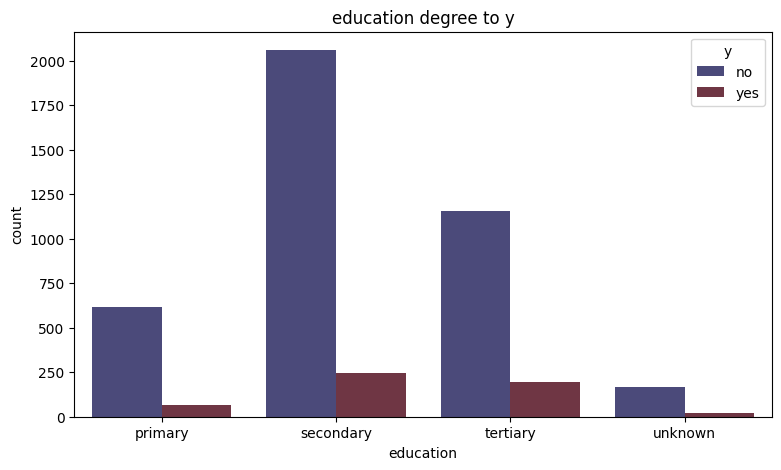

In [169]:
plt.figure(figsize=(9, 5))
sns.countplot(data=df, x='education', hue='y', palette="icefire")
plt.title('education degree to y', fontsize=12)

Text(0.5, 1.0, 'education degree to y')

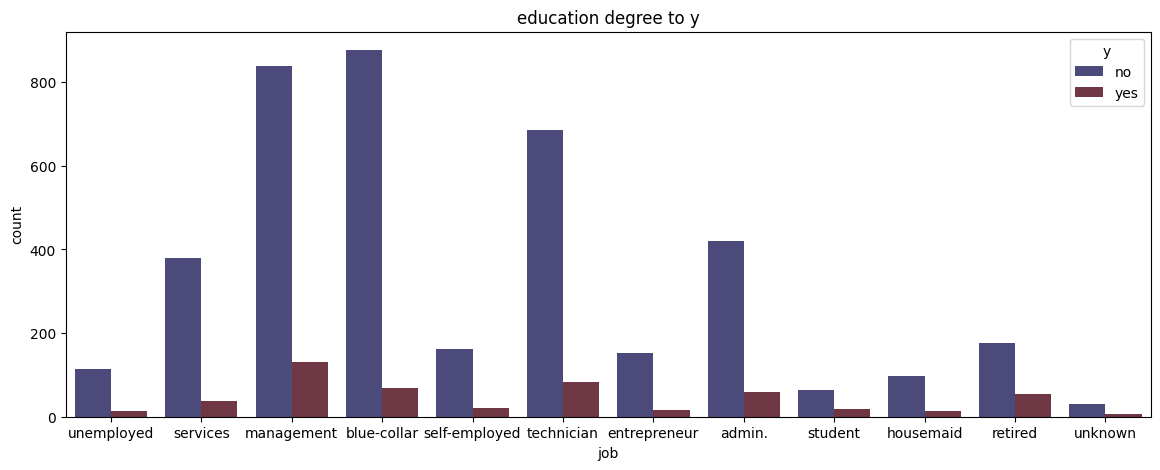

In [170]:
plt.figure(figsize=(14, 5))
sns.countplot(data=df, x='job', hue='y', palette="icefire")
plt.title('education degree to y', fontsize=12)

Text(0.5, 1.0, 'education degree to y')

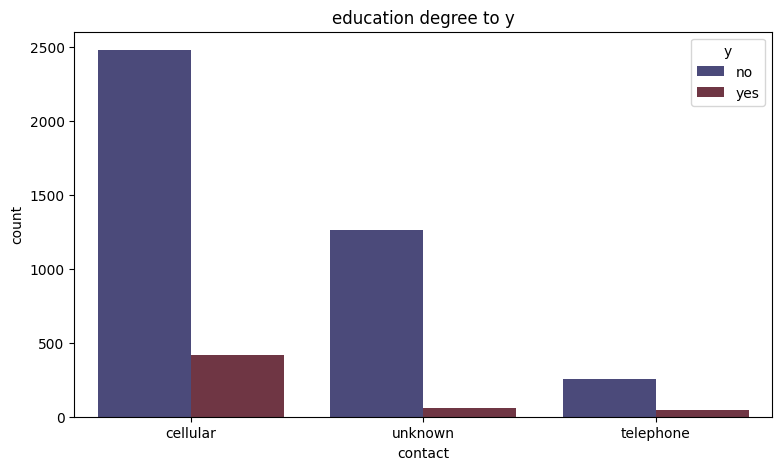

In [171]:
plt.figure(figsize=(9, 5))
sns.countplot(data=df, x='contact', hue='y', palette="icefire")
plt.title('education degree to y', fontsize=12)

Text(0.5, 1.0, 'education degree to y')

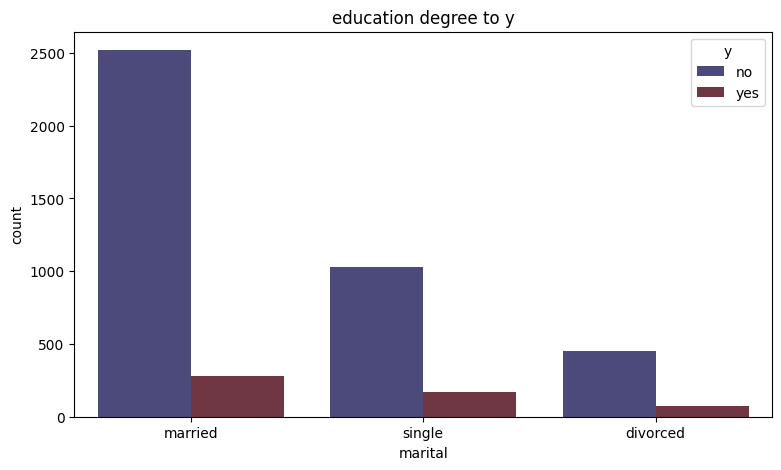

In [172]:
plt.figure(figsize=(9, 5))
sns.countplot(data=df, x='marital', hue='y', palette="icefire")
plt.title('education degree to y', fontsize=12)

Text(0.5, 1.0, 'education degree to y')

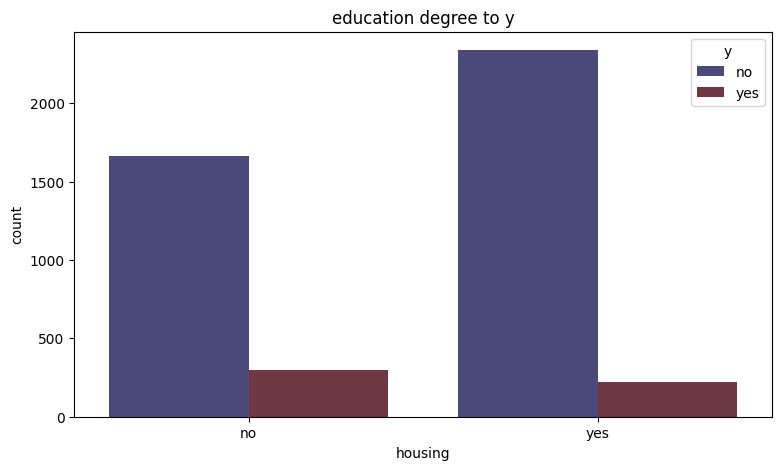

In [173]:
plt.figure(figsize=(9, 5))
sns.countplot(data=df, x='housing', hue='y', palette="icefire")
plt.title('education degree to y', fontsize=12)

<Figure size 1000x1000 with 0 Axes>

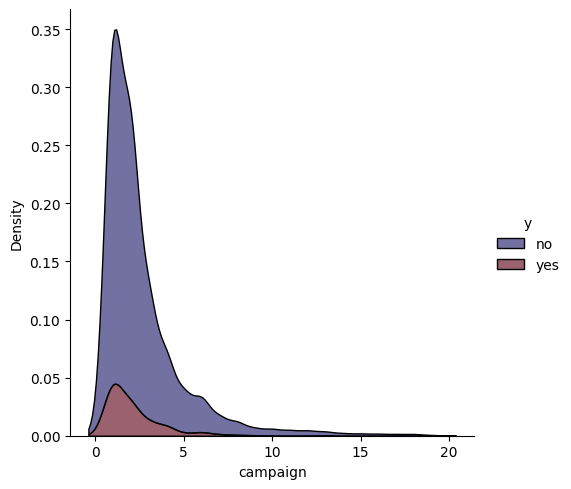

In [174]:
plt.figure(figsize=(10, 10))
sns.displot(data=df[df['campaign']<20], x='campaign', hue='y', palette='icefire', multiple="stack", kind="kde")

Text(0.5, 1.0, 'education degree to y')

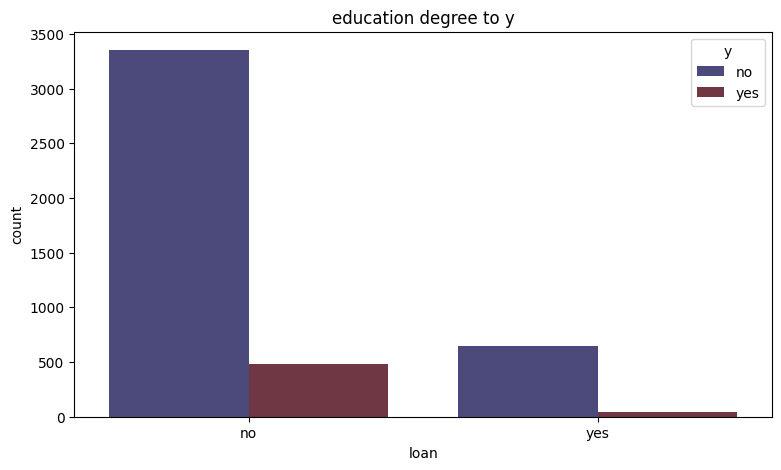

In [175]:
plt.figure(figsize=(9, 5))
sns.countplot(data=df, x='loan', hue='y', palette="icefire")
plt.title('education degree to y', fontsize=12)

<Axes: xlabel='balance', ylabel='Count'>

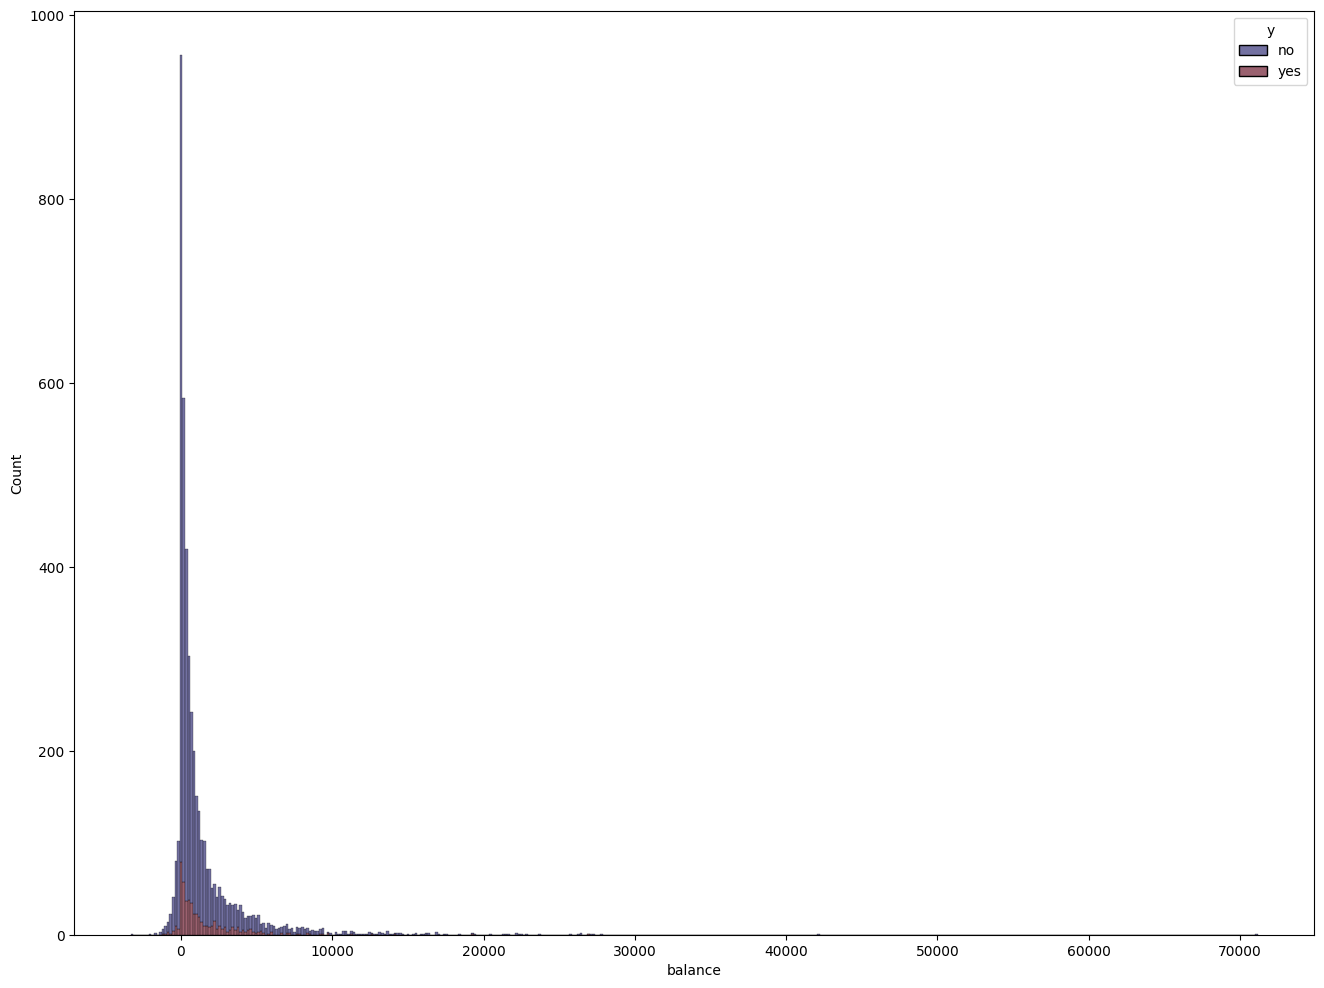

In [176]:
plt.figure(figsize=(16, 12))
sns.histplot(data=df, x='balance', hue='y', palette='icefire', multiple="stack")

In [177]:
df_old = df.copy()
df_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [178]:
data_cat_cols = ['job', 'marital', 'education', 'housing', 'loan','default', 'month', 'contact', 'poutcome']
target = ['y']
data_num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

lencoder = LabelEncoder()

for i in data_cat_cols:
  df[i] = lencoder.fit_transform(df[i])

std = StandardScaler()

df[data_num_cols] = std.fit_transform(df[data_num_cols])

In [179]:
lencoder = LabelEncoder()
df['y'] = lencoder.fit_transform(df['y'])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,-1.056270,10,1,0,0,0.121072,0,0,0,0.374052,10,-0.711861,-0.576829,-0.407218,-0.320413,3,0
1,-0.772583,7,1,1,0,1.118644,1,1,0,-0.596026,8,-0.169194,-0.576829,2.989044,2.041734,0,0
2,-0.583458,4,2,2,0,-0.024144,1,0,0,0.010273,0,-0.303898,-0.576829,2.899143,0.270124,0,0
3,-1.056270,4,1,2,0,0.017726,1,1,2,-1.566105,6,-0.250017,0.387967,-0.407218,-0.320413,3,0
4,1.686036,1,1,1,0,-0.472753,1,0,2,-1.323585,8,-0.146102,-0.576829,-0.407218,-0.320413,3,0


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4521 non-null   float64
 1   job        4521 non-null   int64  
 2   marital    4521 non-null   int64  
 3   education  4521 non-null   int64  
 4   default    4521 non-null   int64  
 5   balance    4521 non-null   float64
 6   housing    4521 non-null   int64  
 7   loan       4521 non-null   int64  
 8   contact    4521 non-null   int64  
 9   day        4521 non-null   float64
 10  month      4521 non-null   int64  
 11  duration   4521 non-null   float64
 12  campaign   4521 non-null   float64
 13  pdays      4521 non-null   float64
 14  previous   4521 non-null   float64
 15  poutcome   4521 non-null   int64  
 16  y          4521 non-null   int64  
dtypes: float64(7), int64(10)
memory usage: 600.6 KB


In [181]:
df_num = df.astype('float64')
fig = px.box(df_num, title='boxplots for all features', facet_col_wrap=3)
fig.show()

# Correlation matrix

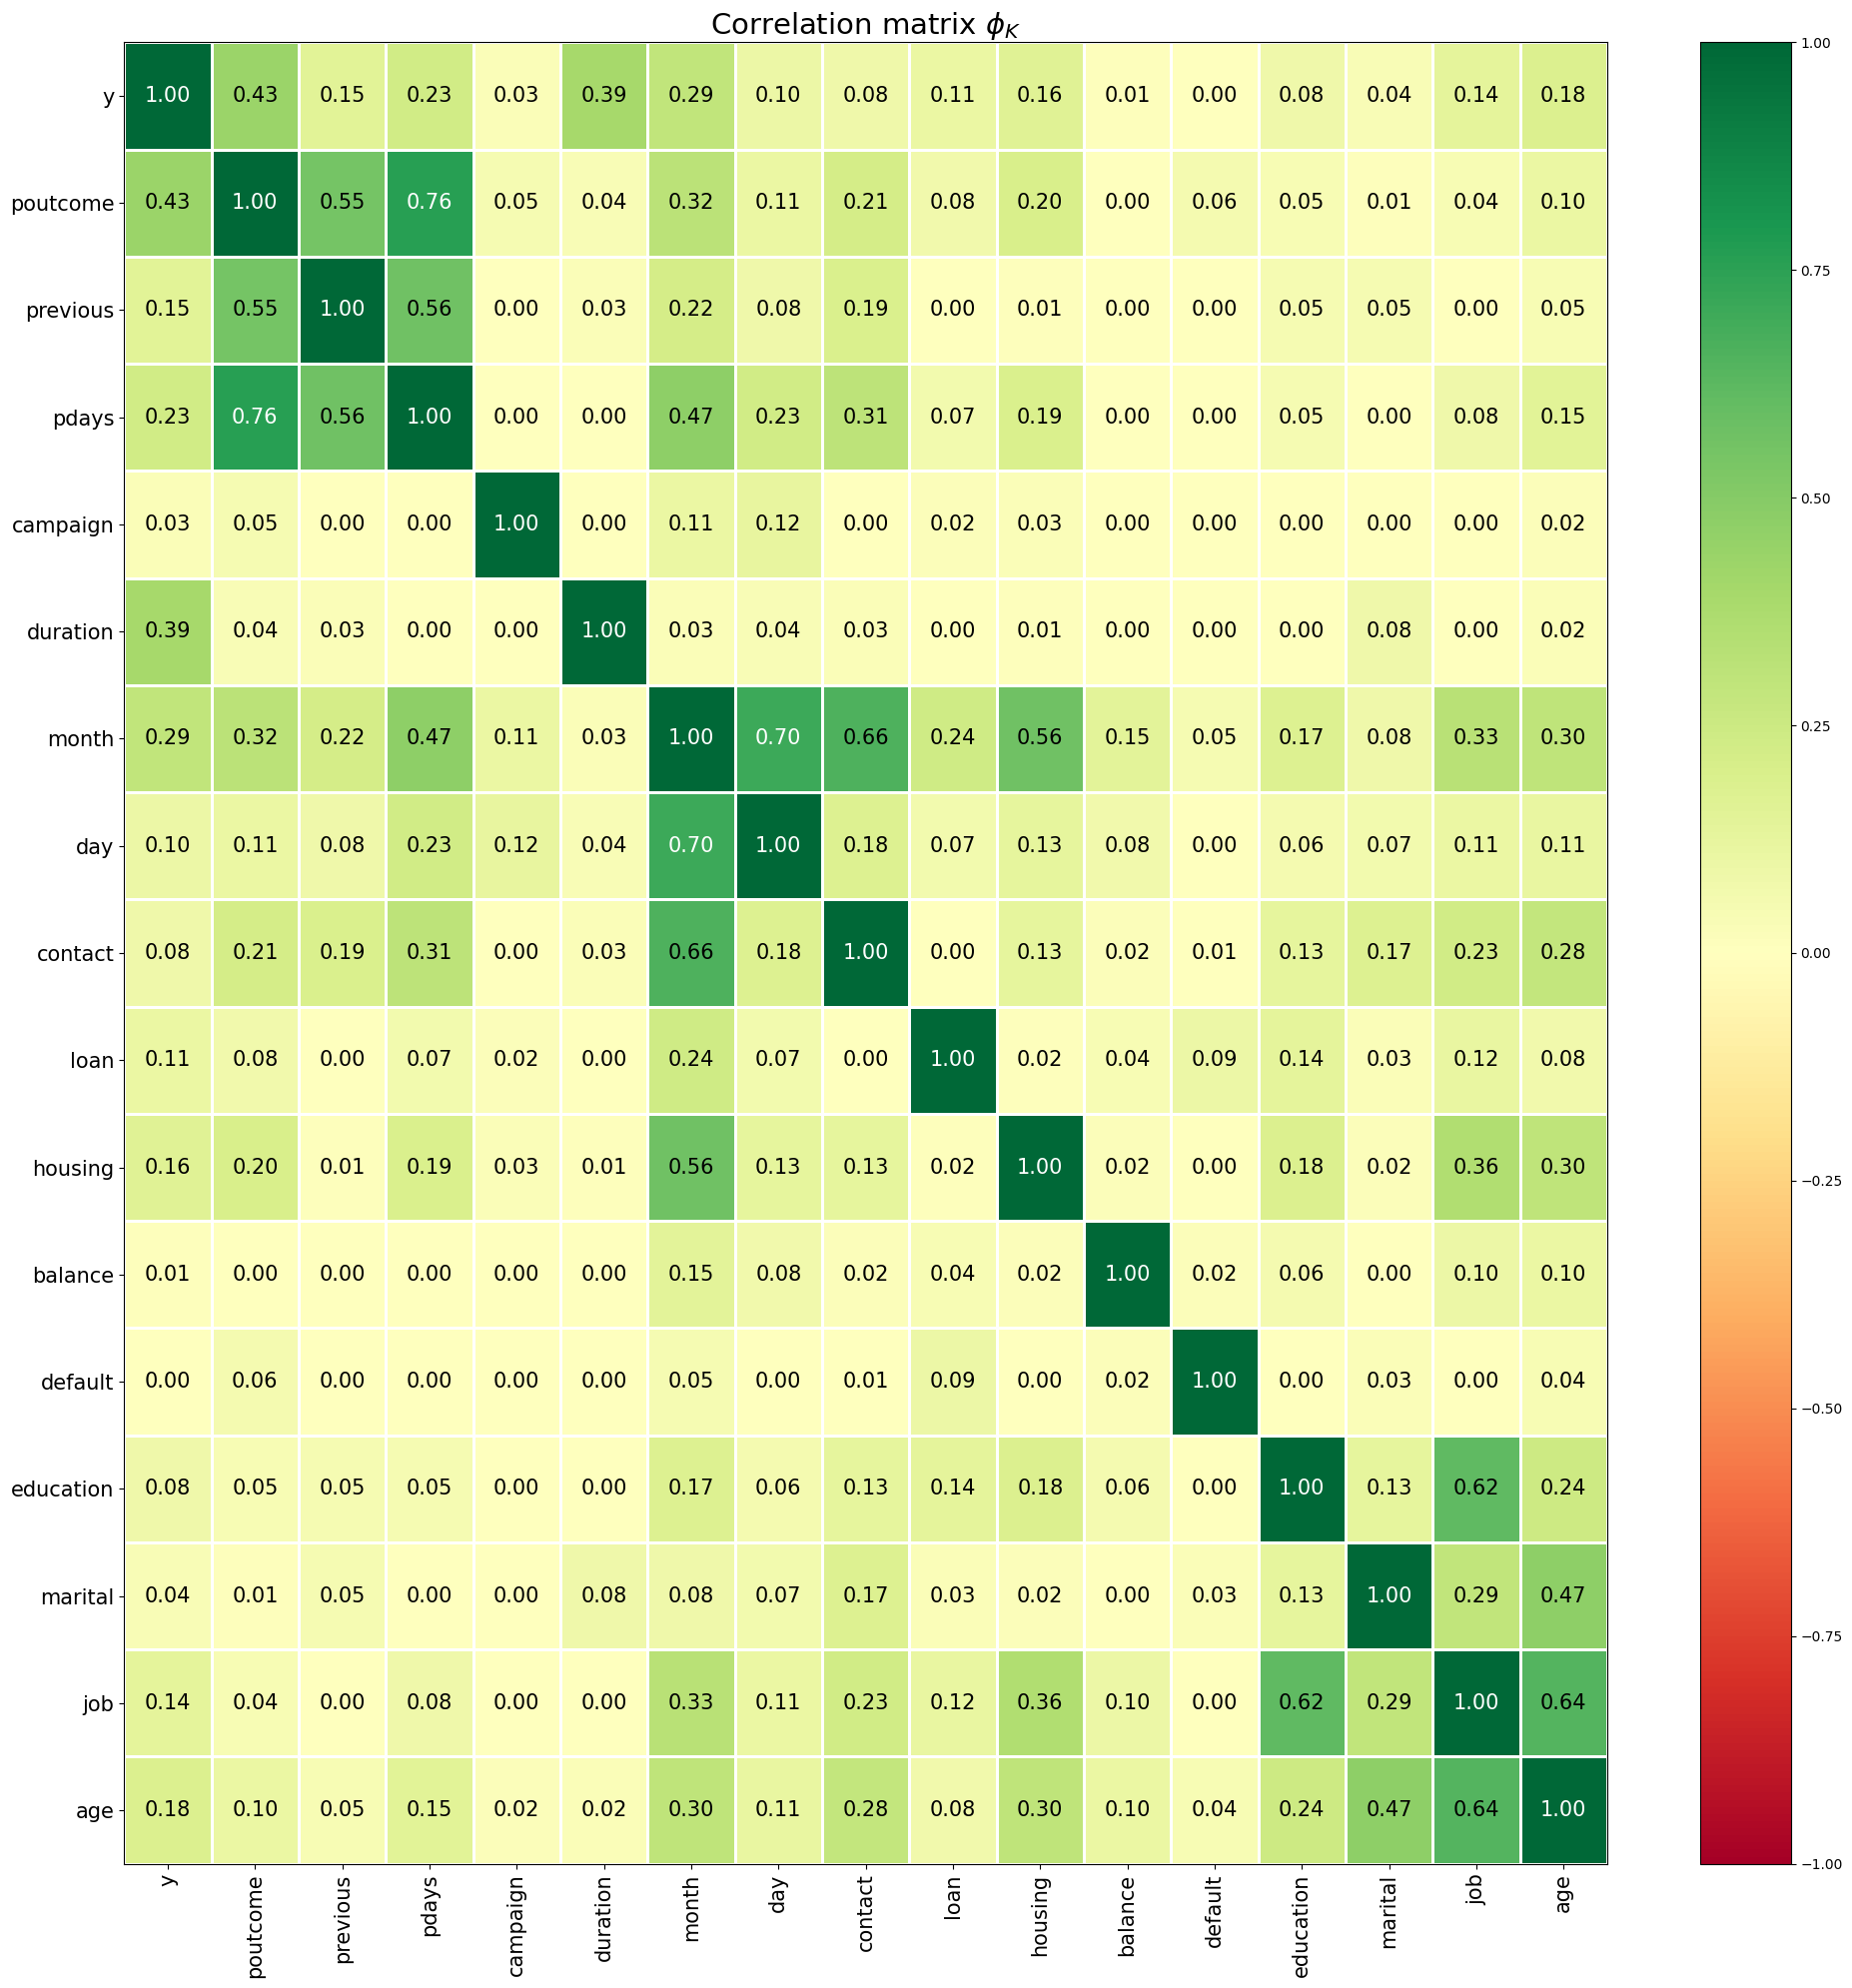

In [182]:
phik_features_matrix(df, df.columns)

In [183]:
df = df.drop(['default', 'pdays'], axis=1)

In [184]:
X = df.drop('y', axis=1)
y = df['y']

In [185]:
scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [186]:
X[X.columns] = scaler.transform(X)

In [187]:
from imblearn.over_sampling import RandomOverSampler
sm=RandomOverSampler()
X, y =sm.fit_resample(X, y)

# Building and machine learning model

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [189]:
model = CatBoostClassifier(iterations = 500, learning_rate=0.1, depth=10, l2_leaf_reg = 2, loss_function = 'Logloss')
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=100)

0:	learn: 0.6123357	test: 0.6219839	best: 0.6219839 (0)	total: 97ms	remaining: 48.4s
100:	learn: 0.0330388	test: 0.1041145	best: 0.1041145 (100)	total: 2.84s	remaining: 11.2s
200:	learn: 0.0090108	test: 0.0809274	best: 0.0809274 (200)	total: 6.78s	remaining: 10.1s
300:	learn: 0.0041892	test: 0.0775254	best: 0.0774204 (294)	total: 10.6s	remaining: 6.99s
400:	learn: 0.0031532	test: 0.0762914	best: 0.0762913 (396)	total: 13s	remaining: 3.21s
499:	learn: 0.0029268	test: 0.0764356	best: 0.0762770 (415)	total: 16s	remaining: 0us

bestTest = 0.07627696207
bestIteration = 415

Shrink model to first 416 iterations.


In [190]:
y_pred = model.predict(X_test)

In [191]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9675

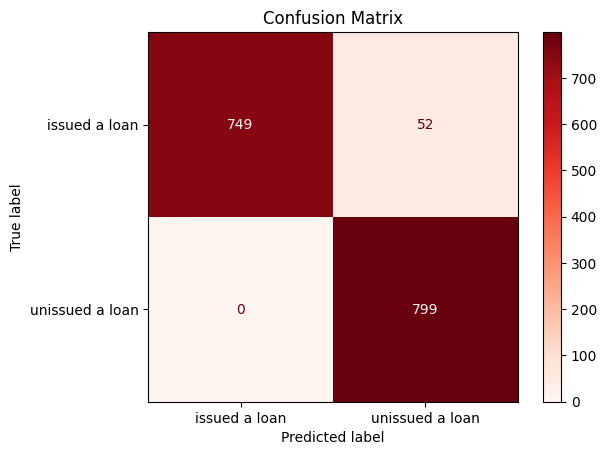

In [192]:
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['issued a loan', 'unissued a loan']

disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=class_names)

disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.show()

In [193]:
from sklearn.ensemble import RandomForestClassifier

In [194]:
rfc = RandomForestClassifier(criterion='entropy',max_depth= None, min_samples_leaf= 2, min_samples_split= 4)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=4)

In [195]:
y_pred = rfc.predict(X_test)

In [196]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9725

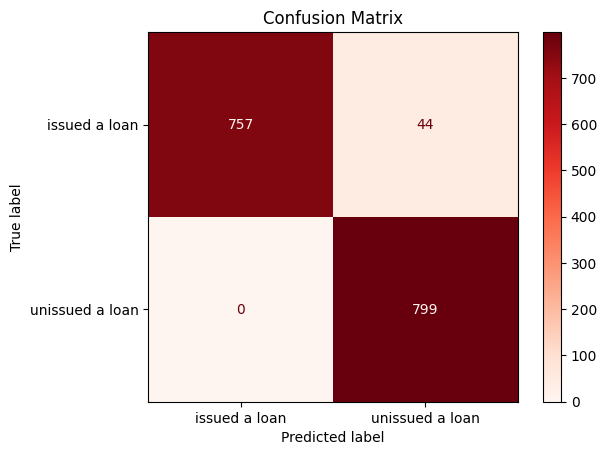

In [197]:
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['issued a loan', 'unissued a loan']

disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=class_names)

disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.show()